In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from xgboost import XGBRegressor

In [74]:
train9 = pd.read_csv('data/train/train9.csv')
print (train9.shape)
train9[:5]

(18846, 6)


,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,74,1_74,304,185,3743.699732
1,1,65,1_65,255,151,4009.021513
2,1,39,1_39,203,135,5094.621514
3,1,106,1_106,158,106,4619.212963
4,1,2,1_2,157,94,2871.627907


In [75]:
train1 = pd.read_csv('data/train/train1.csv')
print (train1.shape)

train1[:5]

(2094, 6)


,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,41,1_41,201,125,3731.707317
1,2,17,2_17,427,234,2922.058381
2,5,106,5_106,240,130,5116.682739
3,6,65,6_65,206,122,4131.553861
4,7,69,7_69,697,382,2474.469306


In [76]:
hero = pd.read_csv('data/train/hero_data.csv')
print (hero.shape)

hero[:5]

(115, 23)


,hero_id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,agi,Melee,Carry:Escape:Nuker,200,1.50,75,0.9,-1.0,25,...,22,12,1.3,2.8,1.8,150,0,1.45,310,0.5
1,2,str,Melee,Initiator:Durable:Disabler:Jungler,200,4.25,75,0.9,-1.0,25,...,20,18,2.8,2.2,1.6,150,900,1.70,290,0.6
2,3,int,Ranged,Support:Disabler:Nuker:Durable,200,1.50,75,0.9,1.0,25,...,23,23,2.4,2.4,2.4,400,900,1.70,310,0.6
3,4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator,200,1.50,75,0.9,0.0,25,...,24,18,2.7,3.0,1.7,150,900,1.70,285,0.5
4,5,int,Ranged,Support:Disabler:Nuker:Jungler,200,1.50,75,0.9,-1.0,25,...,16,16,2.0,1.6,2.9,600,900,1.70,275,0.5


In [77]:
test9 = pd.read_csv('data/test/test9.csv')
print (test9.shape)
test9[:5]

(8082, 6)


,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,3,65,3_65,330,183,3418.470419
1,3,104,3_104,231,107,2522.639069
2,3,7,3_7,200,103,2793.255132
3,3,19,3_19,189,91,3493.495230
4,3,4,3_4,182,102,3586.402266


In [78]:
test1 = pd.read_csv('data/test/test1.csv')
print (test1.shape)
test1[:5]

(898, 4)


,user_id,hero_id,id,num_games
0,3,53,3_53,278
1,4,17,4_17,180
2,9,51,9_51,70
3,10,54,10_54,189
4,15,74,15_74,263


In [79]:
sample_subm = pd.read_csv('data/sample_submission_CKEH6IJ.csv')
sample_subm.shape

(898, 2)

In [80]:
np.unique(test9['hero_id'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 120])

In [81]:
np.unique(train9['hero_id'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 120])

(array([  1.24470000e+04,   6.33200000e+03,   5.90000000e+01,
          4.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([     0.,   3800.,   7600.,  11400.,  15200.,  19000.,  22800.,
         26600.,  30400.,  34200.,  38000.]),
 <a list of 10 Patch objects>)

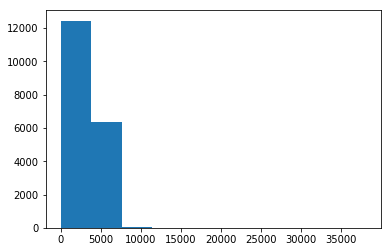

In [82]:
plt.hist(train9['kda_ratio'])

In [83]:
np.mean(train9['kda_ratio'])

3543.4620031086924

In [84]:
np.unique(hero['attack_type'])

array(['Melee', 'Ranged'], dtype=object)

In [85]:
all_roles = hero['roles']
all_roles[:5]

0                        Carry:Escape:Nuker
1        Initiator:Durable:Disabler:Jungler
2            Support:Disabler:Nuker:Durable
3    Carry:Disabler:Jungler:Nuker:Initiator
4            Support:Disabler:Nuker:Jungler
Name: roles, dtype: object

In [86]:
from itertools import chain


In [87]:
all_roles = np.unique(list(chain.from_iterable([i.split(':') for i in all_roles])))

In [88]:
all_roles

array(['Carry', 'Disabler', 'Durable', 'Escape', 'Initiator', 'Jungler',
       'Nuker', 'Pusher', 'Support'],
      dtype='<U9')

In [89]:
np.unique(hero['turn_rate'])

array([ 0.5 ,  0.6 ,  0.65,  0.7 ,  0.8 ,  0.9 ,  1.  ])

In [90]:
hero.columns

Index(['hero_id', 'primary_attr', 'attack_type', 'roles', 'base_health',
       'base_health_regen', 'base_mana', 'base_mana_regen', 'base_armor',
       'base_magic_resistance', 'base_attack_min', 'base_attack_max',
       'base_strength', 'base_agility', 'base_intelligence', 'strength_gain',
       'agility_gain', 'intelligence_gain', 'attack_range', 'projectile_speed',
       'attack_rate', 'move_speed', 'turn_rate'],
      dtype='object')

In [91]:
hero = hero.drop(columns=['base_health','base_mana','base_mana_regen'])

In [92]:
def role_present(x, role):
    if x.find(role)==-1:
        return 0
    return 1
for role in all_roles:
    hero[role] = hero['roles'].apply(lambda x: role_present(x,role))
hero = hero.drop(columns=['roles'])

In [93]:
hero[:5]

,hero_id,primary_attr,attack_type,base_health_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,base_agility,...,turn_rate,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
0,1,agi,Melee,1.50,-1.0,25,27,31,22,22,...,0.5,1,0,0,1,0,0,1,0,0
1,2,str,Melee,4.25,-1.0,25,24,28,25,20,...,0.6,0,1,1,0,1,1,0,0,0
2,3,int,Ranged,1.50,1.0,25,37,43,23,23,...,0.6,0,1,1,0,0,0,1,0,1
3,4,agi,Melee,1.50,0.0,25,33,39,23,24,...,0.5,1,1,0,0,1,1,1,0,0
4,5,int,Ranged,1.50,-1.0,25,19,25,16,16,...,0.5,0,1,0,0,0,1,1,0,1


In [94]:
hero['base_attack_range'] = np.log1p(hero['base_attack_max']-hero['base_attack_min'])
hero['base_defence'] = np.log1p(hero['base_health_regen']*np.exp(hero['base_armor'])*hero['base_magic_resistance']*hero['base_intelligence'])
hero['base_offence'] = np.log1p(hero['base_strength']*hero['base_agility']*hero['base_attack_min']*hero['base_attack_range']*hero['base_intelligence'])

In [95]:
hero['attack_effect'] = np.log1p(hero['attack_range']*hero['projectile_speed']*hero['attack_rate']*hero['move_speed'])
hero['gains'] = np.log1p(hero['strength_gain'] * hero['agility_gain'] * hero['intelligence_gain'])
hero['strength_gain_rate'] = hero['strength_gain']/hero['base_strength']
hero['agility_gain_rate'] = hero['agility_gain']/hero['base_agility']
hero['intelligence_gain_rate'] = hero['intelligence_gain']/hero['base_intelligence']
hero['total_gains'] = np.log1p(2**hero['strength_gain_rate'] * 2**hero['agility_gain_rate'] * 2**hero['intelligence_gain_rate'])
hero['defence_levels'] = np.log1p(hero['base_armor']*hero['base_attack_range']/hero['attack_range'])
hero['attack_levels'] = np.log1p(np.exp(hero['base_armor']) *hero['base_attack_max']*hero['strength_gain']*hero['attack_range']*hero['attack_rate'])
hero['overall'] = np.log1p(hero['base_agility']*hero['agility_gain'] + hero['base_strength']*hero['strength_gain'] + hero['base_intelligence']*hero['intelligence_gain'])
hero['movement'] = np.log1p(hero['projectile_speed']*hero['move_speed']/(hero['turn_rate']+1))
hero['regen'] = np.log1p(hero['base_health_regen']*hero['attack_range']*hero['attack_rate']*hero['move_speed']*hero['turn_rate'])
hero['offence_defence'] = hero['base_offence']*hero['base_defence']*np.log1p(hero['strength_gain_rate']*hero['agility_gain_rate']*hero['intelligence_gain_rate'])
hero['defence_range'] = np.log(hero['base_attack_min']**np.log(hero['move_speed']*hero['turn_rate']))
hero['effects'] = hero['total_gains']*hero['regen']/(hero['offence_defence']+1)
hero[:5]


,hero_id,primary_attr,attack_type,base_health_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,base_agility,...,intelligence_gain_rate,total_gains,defence_levels,attack_levels,overall,movement,regen,offence_defence,defence_range,effects
0,1,agi,Melee,1.50,-1.0,25,27,31,22,22,...,0.150000,0.816501,-0.010788,8.078860,4.725616,0.000000,10.831109,0.071738,16.622306,8.251662
1,2,str,Melee,4.25,-1.0,25,24,28,25,20,...,0.088889,0.806686,-0.010788,8.903223,4.968423,12.002278,12.147243,0.091575,16.395755,8.976949
2,3,int,Ranged,1.50,1.0,25,37,43,23,23,...,0.104348,0.807514,0.004853,12.158767,5.115596,12.068969,12.153310,0.120577,18.869742,8.757953
3,4,agi,Melee,1.50,0.0,25,33,39,23,24,...,0.094444,0.816684,0.000000,10.198114,5.110179,12.049425,10.906089,0.120621,17.340377,7.948120
4,5,int,Ranged,1.50,-1.0,25,19,25,16,16,...,0.181250,0.843822,-0.003248,9.839634,4.653960,12.013707,12.256652,0.145805,14.497310,9.026344


In [96]:
np.min(hero['offence_defence'])

0.031686951986592396

In [97]:
from itertools import combinations
iters = ['base_health_regen',
       'base_armor', 'base_magic_resistance', 'base_attack_min',
       'base_attack_max', 'base_strength', 'base_agility', 'base_intelligence',
       'strength_gain', 'agility_gain', 'intelligence_gain', 'attack_range',
       'projectile_speed', 'attack_rate', 'move_speed', 'turn_rate']
len (list(combinations(iters,3)))

560

In [98]:
all_train = train9.append(train1).reset_index(drop=True)
all_train = all_train.append(test9[list(train9.columns)]).reset_index(drop=True)
all_train[:5]

,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,74,1_74,304,185,3743.699732
1,1,65,1_65,255,151,4009.021513
2,1,39,1_39,203,135,5094.621514
3,1,106,1_106,158,106,4619.212963
4,1,2,1_2,157,94,2871.627907


In [99]:
all_train = all_train.sort_values(by='num_games').reset_index(drop=True)
all_train[:5]

,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,2611,51,2611_51,1,0,1538.461538
1,880,6,880_6,1,1,5666.666667
2,1708,57,1708_57,1,0,1000.000000
3,880,41,880_41,1,1,38000.000000
4,486,114,486_114,1,1,4666.666667


In [100]:
np.sum(all_train['kda_ratio']>9000)

32

In [101]:
all_train['kda_ratio'].loc[all_train['kda_ratio']>8000]=8000
all_train['kda_ratio'].loc[all_train['kda_ratio']<1200]=1200

all_train[:5]

/Users/yasarrafiahmed/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,2611,51,2611_51,1,0,1538.461538
1,880,6,880_6,1,1,5666.666667
2,1708,57,1708_57,1,0,1200.000000
3,880,41,880_41,1,1,8000.000000
4,486,114,486_114,1,1,4666.666667


In [102]:
all_train['all_kda_ratio'] = all_train['kda_ratio']*all_train['num_games']
all_train[:5]

,user_id,hero_id,id,num_games,num_wins,kda_ratio,all_kda_ratio
0,2611,51,2611_51,1,0,1538.461538,1538.461538
1,880,6,880_6,1,1,5666.666667,5666.666667
2,1708,57,1708_57,1,0,1200.000000,1200.000000
3,880,41,880_41,1,1,8000.000000,8000.000000
4,486,114,486_114,1,1,4666.666667,4666.666667


In [103]:
user_status = all_train.groupby('user_id').agg({'num_games':np.sum, 'num_wins':np.sum, 'kda_ratio':np.mean, 'all_kda_ratio':np.sum}).reset_index()
user_status['all_kda_ratio'] = user_status['all_kda_ratio']/user_status['num_games']
user_status['win_percent'] = user_status['num_wins']*100.0/user_status['num_games']
new_colnames = ['user_id'] + ['user_'+i for i in list(user_status.columns[1:])]
user_status.columns = new_colnames
user_status[:5]

,user_id,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent
0,1,1794,1117,3844.926356,3890.031686,62.263099
1,2,3481,1882,2864.319372,2872.340202,54.064924
2,3,1827,957,3096.586034,3105.545740,52.380952
3,4,3327,1932,3156.761161,3203.111476,58.070334
4,5,2219,1283,4286.307182,4269.918464,57.818837


In [104]:
hero_status = all_train.groupby('hero_id').agg({'num_games':np.sum, 'num_wins':np.sum, 'kda_ratio':np.mean, 'all_kda_ratio':np.sum}).reset_index()
hero_status['all_kda_ratio'] = hero_status['all_kda_ratio']/hero_status['num_games']
hero_status['win_percent'] = hero_status['num_wins']*100.0/hero_status['num_games']
new_colnames = ['hero_id'] + ['hero_'+i for i in list(hero_status.columns[1:])]
hero_status.columns = new_colnames
hero_status[:5]

,hero_id,hero_num_games,hero_num_wins,hero_kda_ratio,hero_all_kda_ratio,hero_win_percent
0,1,123300,68874,3873.654435,3820.137836,55.858881
1,2,43075,23337,2785.782458,2739.400837,54.177597
2,3,11148,6199,2614.670766,2438.851952,55.606387
3,4,37115,21685,3862.692166,3772.920108,58.426512
4,5,25552,14176,2441.035876,2469.190667,55.479023


(array([  3.,   7.,  12.,  23.,  23.,  20.,  12.,   7.,   4.,   4.]),
 array([-2.37075476, -1.86715633, -1.36355791, -0.85995949, -0.35636107,
         0.14723736,  0.65083578,  1.1544342 ,  1.65803263,  2.16163105,
         2.66522947]),
 <a list of 10 Patch objects>)

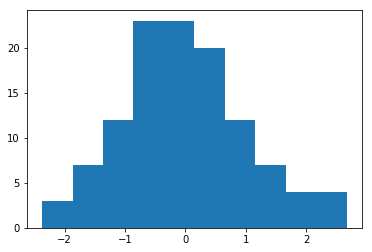

In [105]:
from scipy.stats import zscore
plt.hist(zscore(hero_status['hero_win_percent']))

(array([  417.,  3840.,  8260.,  7949.,  4780.,  2268.,   895.,   354.,
          124.,   135.]),
 array([ 1200.,  1880.,  2560.,  3240.,  3920.,  4600.,  5280.,  5960.,
         6640.,  7320.,  8000.]),
 <a list of 10 Patch objects>)

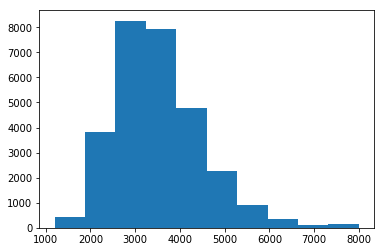

In [106]:
plt.hist(all_train['kda_ratio'])

(array([  417.,  3842.,  8258.,  7951.,  4781.,  2266.,   894.,   354.,
          124.,   135.]),
 array([-2.364004  , -1.67279038, -0.98157676, -0.29036314,  0.40085048,
         1.0920641 ,  1.78327772,  2.47449134,  3.16570496,  3.85691858,
         4.5481322 ]),
 <a list of 10 Patch objects>)

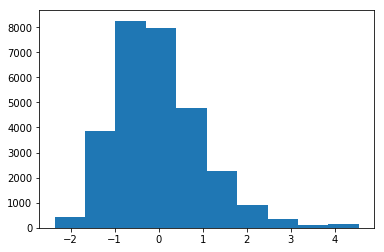

In [107]:
plt.hist(zscore(all_train['kda_ratio']))

In [108]:
np.min(test1['num_games'])

2

In [109]:
np.max(test1['num_games'])

3176

In [110]:
np.max(train9['num_games'])

7280

In [111]:
# all_train = all_train.drop(columns='num_wins')
all_train = all_train[all_train['num_games']>1].reset_index(drop=True)
all_train[:5]

,user_id,hero_id,id,num_games,num_wins,kda_ratio,all_kda_ratio
0,922,9,922_9,2,1,1538.461538,3076.923077
1,885,71,885_71,2,0,1200.000000,2400.000000
2,885,51,885_51,2,2,2035.714286,4071.428571
3,885,33,885_33,2,2,3916.666667,7833.333333
4,880,33,880_33,2,0,1333.333333,2666.666667


In [112]:
all_train = pd.merge(left=all_train, right=hero, on='hero_id', how='left')
all_train = pd.merge(left=all_train, right=hero_status, on='hero_id', how='left')
all_train = pd.merge(left=all_train, right=user_status, on='user_id', how='left')
all_train[:5]

,user_id,hero_id,id,num_games,num_wins,kda_ratio,all_kda_ratio,primary_attr,attack_type,base_health_regen,...,hero_num_games,hero_num_wins,hero_kda_ratio,hero_all_kda_ratio,hero_win_percent,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent
0,922,9,922_9,2,1,1538.461538,3076.923077,agi,Ranged,1.5,...,144441,80782,3765.594020,3723.801025,55.927334,684,403,2616.561330,2634.885144,58.918129
1,885,71,885_71,2,0,1200.000000,2400.000000,str,Melee,1.0,...,38274,21988,3113.420657,3152.588083,57.448921,2145,1171,1798.753431,1825.019824,54.592075
2,885,51,885_51,2,2,2035.714286,4071.428571,str,Melee,1.5,...,65604,37677,3204.380589,3209.194532,57.430949,2145,1171,1798.753431,1825.019824,54.592075
3,885,33,885_33,2,2,3916.666667,7833.333333,int,Ranged,1.5,...,23771,13811,3352.304070,3296.353249,58.100206,2145,1171,1798.753431,1825.019824,54.592075
4,880,33,880_33,2,0,1333.333333,2666.666667,int,Ranged,1.5,...,23771,13811,3352.304070,3296.353249,58.100206,213,171,4916.495616,5537.408381,80.281690


In [113]:
all_train['user_num_games'] = all_train['user_num_games'] - all_train['num_games']
all_train['hero_num_games'] = all_train['hero_num_games'] - all_train['num_games']
all_train['user_num_wins'] = all_train['user_num_wins'] - all_train['num_wins']
all_train['hero_num_wins'] = all_train['hero_num_wins'] - all_train['num_wins']
all_train = all_train.drop(columns='num_wins')
all_train[:5]

,user_id,hero_id,id,num_games,kda_ratio,all_kda_ratio,primary_attr,attack_type,base_health_regen,base_armor,...,hero_num_games,hero_num_wins,hero_kda_ratio,hero_all_kda_ratio,hero_win_percent,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent
0,922,9,922_9,2,1538.461538,3076.923077,agi,Ranged,1.5,-1.0,...,144439,80781,3765.594020,3723.801025,55.927334,682,402,2616.561330,2634.885144,58.918129
1,885,71,885_71,2,1200.000000,2400.000000,str,Melee,1.0,3.0,...,38272,21988,3113.420657,3152.588083,57.448921,2143,1171,1798.753431,1825.019824,54.592075
2,885,51,885_51,2,2035.714286,4071.428571,str,Melee,1.5,0.0,...,65602,37675,3204.380589,3209.194532,57.430949,2143,1169,1798.753431,1825.019824,54.592075
3,885,33,885_33,2,3916.666667,7833.333333,int,Ranged,1.5,2.0,...,23769,13809,3352.304070,3296.353249,58.100206,2143,1169,1798.753431,1825.019824,54.592075
4,880,33,880_33,2,1333.333333,2666.666667,int,Ranged,1.5,2.0,...,23769,13811,3352.304070,3296.353249,58.100206,211,171,4916.495616,5537.408381,80.281690


In [114]:
all_train['user_games_per_win'] = all_train['user_num_games']/(all_train['user_num_wins']+1)
all_train['hero_games_per_win'] = all_train['hero_num_games']/(all_train['hero_num_wins']+1)


In [115]:

primary_attr = all_train[['primary_attr','kda_ratio']].groupby('primary_attr').mean().reset_index()
primary_attr.columns = ['primary_attr','primary_attr_kda']
primary_attr[:5]

,primary_attr,primary_attr_kda
0,agi,3807.339775
1,int,3470.815515
2,str,3145.879163


In [116]:
attack_type = all_train[['attack_type','kda_ratio']].groupby('attack_type').mean().reset_index()
attack_type.columns = ['attack_type','attack_type_kda']
attack_type[:5]

,attack_type,attack_type_kda
0,Melee,3506.397433
1,Ranged,3543.222580


In [117]:
primary_attack = all_train[['primary_attr','attack_type','kda_ratio']].groupby(['primary_attr','attack_type']).mean().reset_index()
primary_attack.columns = ['primary_attr','attack_type','primary_attack_kda']
primary_attack[:5]


,primary_attr,attack_type,primary_attack_kda
0,agi,Melee,3854.999687
1,agi,Ranged,3739.380643
2,int,Melee,3229.625197
3,int,Ranged,3476.120528
4,str,Melee,3159.977623


In [118]:
all_train = pd.merge(left=all_train, right=primary_attr, on='primary_attr', how='left')
all_train = pd.merge(left=all_train, right=attack_type, on='attack_type', how='left')

all_train = pd.merge(left=all_train, right=primary_attack, on=['primary_attr','attack_type'], how='left')
all_train[:5]

,user_id,hero_id,id,num_games,kda_ratio,all_kda_ratio,primary_attr,attack_type,base_health_regen,base_armor,...,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent,user_games_per_win,hero_games_per_win,primary_attr_kda,attack_type_kda,primary_attack_kda
0,922,9,922_9,2,1538.461538,3076.923077,agi,Ranged,1.5,-1.0,...,682,402,2616.561330,2634.885144,58.918129,1.692308,1.788010,3807.339775,3543.222580,3739.380643
1,885,71,885_71,2,1200.000000,2400.000000,str,Melee,1.0,3.0,...,2143,1171,1798.753431,1825.019824,54.592075,1.828498,1.740507,3145.879163,3506.397433,3159.977623
2,885,51,885_51,2,2035.714286,4071.428571,str,Melee,1.5,0.0,...,2143,1169,1798.753431,1825.019824,54.592075,1.831624,1.741215,3145.879163,3506.397433,3159.977623
3,885,33,885_33,2,3916.666667,7833.333333,int,Ranged,1.5,2.0,...,2143,1169,1798.753431,1825.019824,54.592075,1.831624,1.721144,3470.815515,3543.222580,3476.120528
4,880,33,880_33,2,1333.333333,2666.666667,int,Ranged,1.5,2.0,...,211,171,4916.495616,5537.408381,80.281690,1.226744,1.720895,3470.815515,3543.222580,3476.120528


In [119]:
all_train = all_train.sort_values('num_games').reset_index(drop=True)
all_train[:5]

,user_id,hero_id,id,num_games,kda_ratio,all_kda_ratio,primary_attr,attack_type,base_health_regen,base_armor,...,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent,user_games_per_win,hero_games_per_win,primary_attr_kda,attack_type_kda,primary_attack_kda
0,922,9,922_9,2,1538.461538,3076.923077,agi,Ranged,1.50,-1.0,...,682,402,2616.561330,2634.885144,58.918129,1.692308,1.788010,3807.339775,3543.222580,3739.380643
1,1962,48,1962_48,2,2500.000000,5000.000000,agi,Ranged,1.50,0.0,...,31,17,2861.938788,2579.259071,54.545455,1.722222,1.715385,3807.339775,3543.222580,3739.380643
2,2610,16,2610_16,2,2200.000000,4400.000000,str,Melee,1.50,0.0,...,1261,720,3728.826936,4113.476949,57.086302,1.748960,1.821962,3145.879163,3506.397433,3159.977623
3,304,8,304_8,2,3777.777778,7555.555556,agi,Melee,2.00,0.0,...,305,169,3402.063776,2744.275602,55.700326,1.794118,1.761093,3807.339775,3506.397433,3854.999687
4,1962,60,1962_60,2,1666.666667,3333.333333,str,Melee,3.25,3.0,...,31,18,2861.938788,2579.259071,54.545455,1.631579,1.775347,3145.879163,3506.397433,3159.977623


In [120]:
all_test_users = set(np.unique(test1['user_id']))
all_test_heros = set(np.unique(test1['hero_id']))

In [121]:
all_train.shape

(28982, 65)

In [122]:
all_train = all_train[all_train['user_id'].isin(all_test_users)]
# all_train = all_train[all_train['hero_id'].isin(all_test_heros)]

all_train[:5]

,user_id,hero_id,id,num_games,kda_ratio,all_kda_ratio,primary_attr,attack_type,base_health_regen,base_armor,...,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent,user_games_per_win,hero_games_per_win,primary_attr_kda,attack_type_kda,primary_attack_kda
0,922,9,922_9,2,1538.461538,3076.923077,agi,Ranged,1.50,-1.0,...,682,402,2616.561330,2634.885144,58.918129,1.692308,1.788010,3807.339775,3543.222580,3739.380643
2,2610,16,2610_16,2,2200.000000,4400.000000,str,Melee,1.50,0.0,...,1261,720,3728.826936,4113.476949,57.086302,1.748960,1.821962,3145.879163,3506.397433,3159.977623
6,1951,37,1951_37,2,6333.333333,12666.666667,int,Ranged,1.50,1.0,...,54,21,3137.050028,2708.187571,41.071429,2.454545,1.797060,3470.815515,3543.222580,3476.120528
7,2073,34,2073_34,2,2000.000000,4000.000000,int,Ranged,1.50,2.0,...,431,238,3325.742116,3134.307989,55.427252,1.803347,1.749048,3470.815515,3543.222580,3476.120528
8,2073,88,2073_88,2,1750.000000,3500.000000,agi,Melee,4.75,1.0,...,431,240,3325.742116,3134.307989,55.427252,1.788382,1.764944,3807.339775,3506.397433,3854.999687


In [123]:
all_train.shape

(8069, 65)

In [124]:
for col in all_train.columns:
    print (col,' : ', all_train[col].dtype)

user_id  :  int64
hero_id  :  int64
id  :  object
num_games  :  int64
kda_ratio  :  float64
all_kda_ratio  :  float64
primary_attr  :  object
attack_type  :  object
base_health_regen  :  float64
base_armor  :  float64
base_magic_resistance  :  int64
base_attack_min  :  int64
base_attack_max  :  int64
base_strength  :  int64
base_agility  :  int64
base_intelligence  :  int64
strength_gain  :  float64
agility_gain  :  float64
intelligence_gain  :  float64
attack_range  :  int64
projectile_speed  :  int64
attack_rate  :  float64
move_speed  :  int64
turn_rate  :  float64
Carry  :  int64
Disabler  :  int64
Durable  :  int64
Escape  :  int64
Initiator  :  int64
Jungler  :  int64
Nuker  :  int64
Pusher  :  int64
Support  :  int64
base_attack_range  :  float64
base_defence  :  float64
base_offence  :  float64
attack_effect  :  float64
gains  :  float64
strength_gain_rate  :  float64
agility_gain_rate  :  float64
intelligence_gain_rate  :  float64
total_gains  :  float64
defence_levels  :  flo

In [125]:
cat_features = list(all_roles) + ['primary_attr','attack_type']
all_primary_attr = dict([(j,i) for i,j in enumerate(np.unique(all_train['primary_attr']))])
all_attack_type = dict([(j,i) for i,j in enumerate(np.unique(all_train['attack_type']))])
all_attack_type


{'Melee': 0, 'Ranged': 1}

In [126]:
dict(enumerate(all_primary_attr))

{0: 'agi', 1: 'int', 2: 'str'}

In [127]:
target = all_train['kda_ratio']
train_final = all_train.drop(columns=['user_id','hero_id','id','all_kda_ratio', 'kda_ratio'])
train_final['primary_attr'] = train_final['primary_attr'].apply(lambda x: all_primary_attr[x])
train_final['attack_type'] = train_final['attack_type'].apply(lambda x: all_attack_type[x])
train_final[:5]

,num_games,primary_attr,attack_type,base_health_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,base_agility,...,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent,user_games_per_win,hero_games_per_win,primary_attr_kda,attack_type_kda,primary_attack_kda
0,2,0,1,1.50,-1.0,25,21,32,17,18,...,682,402,2616.561330,2634.885144,58.918129,1.692308,1.788010,3807.339775,3543.222580,3739.380643
2,2,2,0,1.50,0.0,25,25,41,22,19,...,1261,720,3728.826936,4113.476949,57.086302,1.748960,1.821962,3145.879163,3506.397433,3159.977623
6,2,1,1,1.50,1.0,25,22,32,22,10,...,54,21,3137.050028,2708.187571,41.071429,2.454545,1.797060,3470.815515,3543.222580,3476.120528
7,2,1,1,1.50,2.0,25,22,28,17,13,...,431,238,3325.742116,3134.307989,55.427252,1.803347,1.749048,3470.815515,3543.222580,3476.120528
8,2,0,0,4.75,1.0,25,27,31,18,19,...,431,240,3325.742116,3134.307989,55.427252,1.788382,1.764944,3807.339775,3506.397433,3854.999687


In [128]:
from catboost import CatBoostRegressor

In [130]:
cb_model = CatBoostRegressor(iterations=800, learning_rate=0.02, depth=6)

In [131]:
cat_features_idx = [i for i,j in enumerate(list(train_final.columns)) if j in cat_features]

In [132]:
cb_model.fit(train_final, target, cat_features_idx)

In [133]:
train_final.columns

Index(['num_games', 'primary_attr', 'attack_type', 'base_health_regen',
       'base_armor', 'base_magic_resistance', 'base_attack_min',
       'base_attack_max', 'base_strength', 'base_agility', 'base_intelligence',
       'strength_gain', 'agility_gain', 'intelligence_gain', 'attack_range',
       'projectile_speed', 'attack_rate', 'move_speed', 'turn_rate', 'Carry',
       'Disabler', 'Durable', 'Escape', 'Initiator', 'Jungler', 'Nuker',
       'Pusher', 'Support', 'base_attack_range', 'base_defence',
       'base_offence', 'attack_effect', 'gains', 'strength_gain_rate',
       'agility_gain_rate', 'intelligence_gain_rate', 'total_gains',
       'defence_levels', 'attack_levels', 'overall', 'movement', 'regen',
       'offence_defence', 'defence_range', 'effects', 'hero_num_games',
       'hero_num_wins', 'hero_kda_ratio', 'hero_all_kda_ratio',
       'hero_win_percent', 'user_num_games', 'user_num_wins', 'user_kda_ratio',
       'user_all_kda_ratio', 'user_win_percent', 'user_games

In [134]:
all_test = pd.merge(left=test1, right=hero, on='hero_id', how='left')
all_test = pd.merge(left=all_test, right=hero_status, on='hero_id', how='left')
all_test = pd.merge(left=all_test, right=user_status, on='user_id', how='left')

all_test['user_games_per_win'] = all_test['user_num_games']/(all_test['user_num_wins']+1)
all_test['hero_games_per_win'] = all_test['hero_num_games']/(all_test['hero_num_wins']+1)

all_test = pd.merge(left=all_test, right=primary_attr, on='primary_attr', how='left')
all_test = pd.merge(left=all_test, right=attack_type, on='attack_type', how='left')

all_test = pd.merge(left=all_test, right=primary_attack, on=['primary_attr','attack_type'], how='left')
all_test[:5]


soln = all_test[['id']].reset_index(drop=True)
test_final = all_test.drop(columns=['user_id','hero_id','id'])
test_final['primary_attr'] = test_final['primary_attr'].apply(lambda x: all_primary_attr[x])
test_final['attack_type'] = test_final['attack_type'].apply(lambda x: all_attack_type[x])

test_final[:5]



,num_games,primary_attr,attack_type,base_health_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,base_agility,...,user_num_games,user_num_wins,user_kda_ratio,user_all_kda_ratio,user_win_percent,user_games_per_win,hero_games_per_win,primary_attr_kda,attack_type_kda,primary_attack_kda
0,278,1,1,1.5,1.0,25,30,44,19,18,...,1827,957,3096.586034,3105.545740,52.380952,1.907098,1.868426,3470.815515,3543.222580,3476.120528
1,180,1,1,1.5,2.0,25,22,32,19,22,...,3327,1932,3156.761161,3203.111476,58.070334,1.721159,1.691350,3470.815515,3543.222580,3476.120528
2,70,2,0,1.5,0.0,25,28,30,26,13,...,1073,624,3022.862616,3122.132740,58.154706,1.716800,1.741175,3145.879163,3506.397433,3159.977623
3,189,2,0,1.5,-1.0,25,27,37,25,18,...,2284,1287,4013.320345,3977.980479,56.348511,1.773292,1.760506,3145.879163,3506.397433,3159.977623
4,263,1,1,1.5,-1.0,25,19,25,16,14,...,2728,1509,4765.059940,4840.655842,55.315249,1.806623,1.788484,3470.815515,3543.222580,3476.120528


In [135]:
set(train_final.columns)-set(test_final.columns)

set()

In [136]:
preds = cb_model.predict(test_final)

In [137]:
preds

array([ 2701.43451985,  3323.29700936,  2945.27917045,  4590.24961988,
        4798.26488537,  3152.92739954,  3709.30023105,  3662.73683284,
        2721.60232598,  3589.79683338,  2569.12188898,  5554.58558244,
        3298.04628656,  4303.31190058,  2216.05457187,  4432.3447773 ,
        2268.95977014,  2519.07811006,  2519.92752341,  3361.1043483 ,
        2956.61830091,  3783.40846595,  2151.93204522,  2509.99757364,
        3431.25479383,  3989.4125085 ,  2971.44498818,  4341.4872666 ,
        3186.28516982,  3398.23760516,  3368.27468335,  2358.35664732,
        3809.56677118,  2839.85126961,  4544.12086001,  3342.08258357,
        3414.01169653,  3926.14487594,  3650.69432166,  3606.09598402,
        3358.74729877,  3558.05281173,  3483.2422908 ,  3306.28230354,
        2846.2660659 ,  3427.11028591,  2577.3817188 ,  3003.19275708,
        3194.5279583 ,  5043.63476469,  2375.29248125,  3800.54134538,
        3672.20652422,  2888.51317011,  3267.07365556,  4763.34002659,
      

In [138]:
soln['kda_ratio'] = preds
#

(array([  40.,  137.,  220.,  224.,  134.,   90.,   29.,   18.,    5.,    1.]),
 array([ 1794.02593037,  2297.50578527,  2800.98564018,  3304.46549508,
         3807.94534999,  4311.42520489,  4814.90505979,  5318.3849147 ,
         5821.8647696 ,  6325.34462451,  6828.82447941]),
 <a list of 10 Patch objects>)

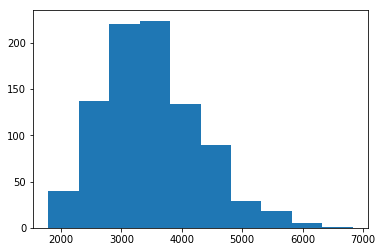

In [139]:
plt.hist(preds)

In [140]:
soln.to_csv('cb_soln_subsetted2.csv',index=False)

In [ ]:
train_final.columns

In [142]:
xgb_model = XGBRegressor(max_depth=6, learning_rate=0.03, n_estimators=120)

In [143]:
xgb_model.fit(X= train_final,y=target, eval_metric='rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=120,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [144]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  Implementation of the scikit-learn API for XGBoost regression.
 |      Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of boosted trees to fit.
 |  silent : boolean
 |      Whether to print messages while running boosting.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use n_jobs)
 |  n_jobs : int
 |      Number of parallel threads used to run xgboost.  (replaces nthread)
 |  gamma : float
 |      Minimum loss reduct

In [145]:
xgb_pred = xgb_model.predict(test_final)
xgb_pred

array([ 2602.26220703,  3330.31665039,  2876.59277344,  4406.99804688,
        4619.81835938,  3147.14160156,  3608.85229492,  3617.94897461,
        2586.7890625 ,  3300.58032227,  2571.09033203,  5327.54345703,
        3299.57470703,  4242.11914062,  2150.85864258,  4165.22021484,
        2231.34106445,  2448.44995117,  2507.56958008,  3208.92382812,
        2976.05395508,  3730.19165039,  2136.80322266,  2434.11914062,
        3473.70776367,  4018.17431641,  2800.3125    ,  4173.20166016,
        3112.2331543 ,  3328.6628418 ,  3205.5390625 ,  2326.49560547,
        3722.25708008,  2798.3034668 ,  4572.60400391,  3221.1887207 ,
        3357.34814453,  3963.96142578,  3651.04736328,  3463.75048828,
        3306.10009766,  3438.96508789,  3276.92602539,  3255.45166016,
        2706.50341797,  3311.58422852,  2470.10449219,  4155.70898438,
        3088.14306641,  4869.88867188,  2359.16748047,  3667.10327148,
        3704.77905273,  2859.04956055,  3261.91796875,  4459.15869141,
      

In [146]:
soln['kda_ratio']=xgb_pred

In [147]:
soln.to_csv('xgb_soln1.csv',index=False)

In [148]:
import lightgbm as lgb


OSError: dlopen(/Users/yasarrafiahmed/anaconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib
  Referenced from: /Users/yasarrafiahmed/anaconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
test_final[:5]

In [ ]:
options = [(0,1900,0.0225),(1,2000,0.02),(2,1800,0.025),(3,2200,0.015),(4,1850,0.024)]
predictions = np.zeros((len(test_final),5))
for i,iters, lr in options:
    model = CatBoostRegressor(iterations=iters, learning_rate=lr, depth=7)
    model.fit(train_final, target, cat_features_idx)
    preds = model.predict(test_final)
    predictions[:,i] = preds

In [ ]:
predictions_final = np.product(predictions[:,:5]**0.2,axis=1)

In [ ]:
predictions_final

In [ ]:
soln = all_test[['id']]
soln['kda_ratio']=predictions_final

In [ ]:
soln.to_csv('cb_stacked_soln6.csv', index=False)

In [ ]:
# train_final.to_csv('train_final.csv',index=False)
# test_final.to_csv('test_final.csv',index=False)

In [ ]:
# target.to_csv('target.csv',index=False)

In [ ]:
# deep_features_train = pd.read_csv('deep_features_train.csv')
# deep_features_train[:5]

In [ ]:
# deep_features_test = pd.read_csv('deep_features_test.csv')
# deep_features_test[:5]

In [ ]:
# train_final_with_features = pd.concat([train_final,deep_features_train],axis=1)
# train_final_with_features[:5]

In [ ]:
# test_final_with_features = pd.concat([test_final,deep_features_test],axis=1)
# test_final_with_features[:5]

In [ ]:
# cb_model_with_features = CatBoostRegressor(iterations=2500, learning_rate=0.02, depth=8)

In [ ]:
# cb_model_with_features.fit(train_final_with_features, target, cat_features_idx)

In [ ]:
# predicted2 = cb_model_with_features.predict(test_final_with_features)

In [ ]:
# predicted2

In [ ]:
# soln['kda_ratio']=predicted2

In [ ]:
# soln.to_csv('catboost_with_level1_features2.csv',index=False)